# TAREA NO. 2 - Estadística Multivariada

## Explicación de la base de datos:

El World Happiness Report evalúa el bienestar de los países en base a varios factores, utilizando distintas métricas que ayudan a explicar los niveles de felicidad de la población. A continuación te explico a qué se refiere cada una de las características de esta base de datos:

- Country name (Nombre del país): Se refiere al nombre oficial del país que está siendo evaluado en el reporte.

- Year (Año): Es el año en el que se recolectaron los datos o se realizó el análisis para el reporte.

- Life Ladder (Escalera de la vida): Este es un indicador de bienestar subjetivo, en el cual se pide a las personas que califiquen su vida en una escala del 0 (la peor vida posible) al 10 (la mejor vida posible) según su propia percepción.

- Log GDP per capita (Logaritmo del PIB per cápita): Representa el logaritmo del Producto Interno Bruto (PIB) per cápita ajustado por poder adquisitivo. El PIB per cápita es una medida del nivel de vida en un país. El logaritmo se usa para escalar los datos y manejar mejor las diferencias entre los países.

- Social support (Apoyo social): Se refiere a la percepción de las personas sobre si tienen o no a alguien en quien puedan confiar en momentos de necesidad. Es un indicador de la red de apoyo social que tienen los individuos.

- Healthy life expectancy at birth (Esperanza de vida saludable al nacer): Estima cuántos años se espera que una persona viva con buena salud desde su nacimiento. Este indicador combina la longevidad con la calidad de vida en términos de salud.

- Freedom to make life choices (Libertad para tomar decisiones de vida): Mide la percepción de las personas sobre su libertad para tomar decisiones importantes en sus vidas, como elegir su ocupación, lugar de residencia, entre otros.

- Generosity (Generosidad): Este indicador evalúa la disposición de las personas a donar dinero o ayudar a los demás, basándose en la cantidad de actos altruistas reportados por los encuestados.

- Perceptions of corruption (Percepciones de corrupción): Mide la percepción de la corrupción en el gobierno y las instituciones empresariales dentro del país. Un valor alto indica una mayor percepción de corrupción.

- Positive affect (Afecto positivo): Representa la frecuencia con la que las personas experimentan emociones positivas como felicidad, risa y disfrute en su vida diaria.

- Negative affect (Afecto negativo): Refleja la frecuencia con la que las personas experimentan emociones negativas como el estrés, la tristeza y el enojo.

In [710]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

## I. Cargar los datos

In [711]:
df = pd.read_csv("world-happiness-report.csv")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


En este caso, las variables categóricas como el PAIS y el AÑO se eliminan del análisis ya que no proporcionan información útil para el análisis.

In [712]:
df = df[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
df.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [713]:
# Calcular la cantidad de valores nulos en cada columna
pd.DataFrame.isnull(df).sum()

Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
dtype: int64

In [714]:
# Imputar los valores nulos con la media de la columna
df = df.fillna(df.mean())

In [715]:
X = df.values
print("Las dimensiones de la matriz de datos son: ", X.shape)

Las dimensiones de la matriz de datos son:  (1949, 7)


In [716]:
print("Las medias de cada columna son: ", np.mean(X, axis=0))
print("Las desviaciones estándar de cada columna son: ", np.std(X, axis=0))

Las medias de cada columna son:  [5.46670549e+00 9.36845269e+00 8.12552169e-01 6.33593738e+01
 7.42557642e-01 1.03225806e-04 7.47125068e-01]
Las desviaciones estándar de cada columna son:  [1.11542424 1.14307692 0.11805533 7.40156351 0.14088479 0.15842571
 0.18139182]


### I.I Escalado de loa datos

In [717]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [718]:
print("La media de cada variable es: ", X_scaled.mean(axis=0))
print("La desviación estándar de cada variable es: ", X_scaled.std(axis=0))

La media de cada variable es:  [-4.95812273e-16  4.84875238e-16 -5.24977701e-16 -2.91654278e-17
  1.12195755e-15 -1.09370354e-17  1.41270041e-16]
La desviación estándar de cada variable es:  [1. 1. 1. 1. 1. 1. 1.]


In [719]:
# Extraer 10 datos de cada característica
X_scaled = X_scaled[:20, :]

## I.II Definición de los métodos que se van a usar

Para cambiar las métricas de distancia, simplemente modifica el parámetro metric dentro de pdist. Aquí algunos ejemplos:

- Para distancia Euclidiana: pdist(X, metric='euclidean')
- Para distancia Manhattan: pdist(X, metric='cityblock')
- Para distancia Chebyshev: pdist(X, metric='chebyshev')
- Para distancia Coseno: pdist(X, metric='cosine')
- Para distancia Mahalanobis: pdist(X, metric='mahalanobis', VI=matriz_inversa_de_covarianza)

In [720]:
distancias = ["euclidean", "cityblock", "chebyshev", "cosine", "mahalanobis"]

In [721]:
metodos = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]

In [722]:
df_c = pd.DataFrame(columns=["Metodo", "Distancia", "Cophenet"])
cont = 0

for metodo in metodos:
    for distancia in distancias:
        if (metodo == "centroid" or metodo == "median" or metodo == "ward") and distancia != "euclidean":
            break

        Z = linkage(X_scaled, method=metodo, metric=distancia)
        c, coph_dists = cophenet(Z, pdist(X_scaled))
        c = round(c, 2)

        df_c.loc[cont] = [metodo, distancia, c]
        cont += 1

df_c.head()

,Metodo,Distancia,Cophenet
0,single,euclidean,0.93
1,single,cityblock,0.92
2,single,chebyshev,0.94
3,single,cosine,0.82
4,single,mahalanobis,0.19


In [723]:
# Ordenar los métodos de enlace por su coeficiente cofenético
df_c = df_c[df_c["Cophenet"] > 0.6].sort_values(by="Cophenet", ascending=False)
print(df_c)

      Metodo  Distancia  Cophenet
11   average  cityblock      0.94
2     single  chebyshev      0.94
20  centroid  euclidean      0.94
6   complete  cityblock      0.94
15  weighted  euclidean      0.94
10   average  euclidean      0.94
12   average  chebyshev      0.93
21    median  euclidean      0.93
16  weighted  cityblock      0.93
0     single  euclidean      0.93
5   complete  euclidean      0.93
22      ward  euclidean      0.93
1     single  cityblock      0.92
17  weighted  chebyshev      0.90
7   complete  chebyshev      0.89
18  weighted     cosine      0.82
3     single     cosine      0.82
13   average     cosine      0.80
8   complete     cosine      0.77


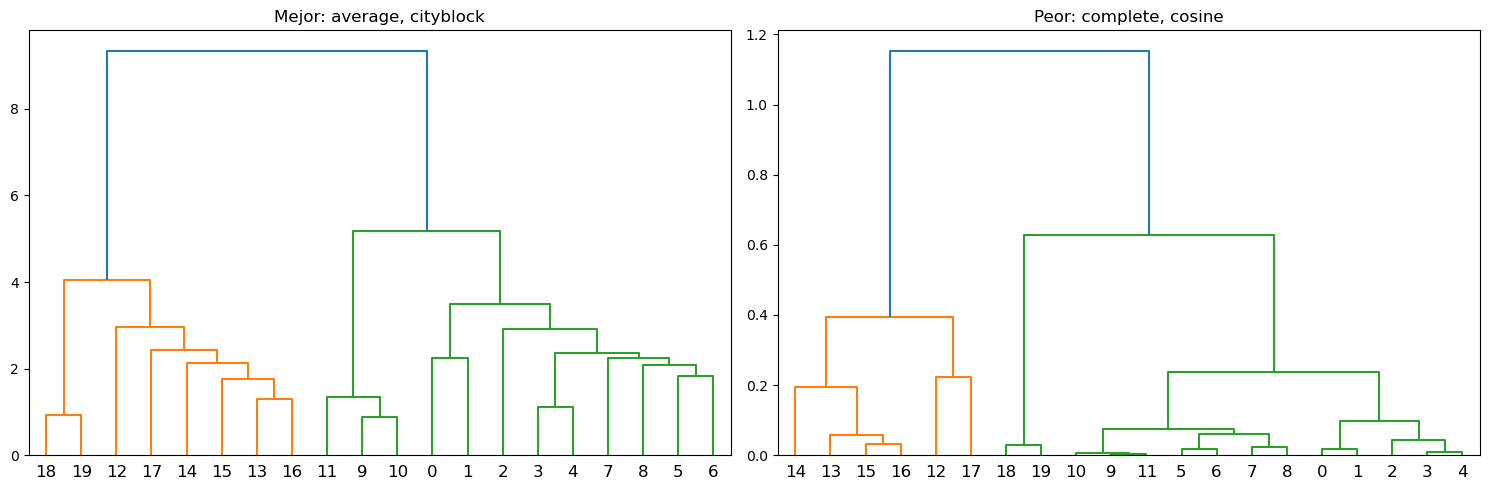

In [724]:
# graficar el dendrograma del mejor método de enlace y el peor método de enlace
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

metodo_mejor = df_c.iloc[0]["Metodo"]
distancia_mejor = df_c.iloc[0]["Distancia"]
Z_mejor = linkage(X_scaled, method=metodo_mejor, metric=distancia_mejor)
dendrogram(Z_mejor, ax=axs[0])
axs[0].set_title("Mejor: " + metodo_mejor + ", " + distancia_mejor)

metodo_peor = df_c.iloc[-1]["Metodo"]
distancia_peor = df_c.iloc[-1]["Distancia"]
Z_peor = linkage(X_scaled, method=metodo_peor, metric=distancia_peor)
dendrogram(Z_peor, ax=axs[1])
axs[1].set_title("Peor: " + metodo_peor + ", " + distancia_peor)

plt.tight_layout()
plt.show()